In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Section A: Data Cleaning & Preprocessing

# 5.

In [2]:
df = pd.read_csv("Dataset/ecommerce_dataset.csv")

In [3]:
df.shape

(5100, 12)

In [4]:
df.head()

,TransactionID,CustomerName,Email,ProductCategory,Quantity,UnitPrice,Discount(%),PaymentMethod,PurchaseDate,City,Country,TotalAmount
0,a3c79106-8772-4149-99fd-2cff74b88ca2,Zachary Prince,jrobinson@gmail.com,Sports,3,304.87,5.0,Debit Card,2024-11-29,South Melissa,USA,868.8795
1,3f3c94ea-7e4d-4bef-bbbc-c25653cb0486,Jill Johnson,bhumphrey@nolan.info,Sports,1,376.89,5.0,Cash on Delivery,2025-04-22,West Laura,Australia,358.0455
2,958e2aa6-dbe9-4402-88ac-c134d8acda3f,Jessica Hutchinson,kristincraig@gmail.com,Electronics,5,218.23,5.0,Credit Card,2025-05-14,Bradleyfurt,India,1036.5925
3,a21237c8-56c4-4500-9037-e13e694da4de,Lisa Green,herringrebecca@yahoo.com,Sports,4,421.51,NaN,Debit Card,2025-01-22,Port Deborah,India,1686.0400
4,e41c3ea9-2e4b-4f1c-a636-1871d9f424ad,Patrick Jenkins,ghicks@patrick.com,Home & Kitchen,2,74.26,0.0,UPI,2025-06-16,Jennaport,UK,148.5200


# 6.

In [5]:
df.isnull().sum()

TransactionID         0
CustomerName          0
Email               271
ProductCategory       0
Quantity              0
UnitPrice             0
Discount(%)        1066
PaymentMethod         0
PurchaseDate          0
City                  0
Country               0
TotalAmount          30
dtype: int64

In [6]:
(df.isnull().sum()/len(df))*100

TransactionID       0.000000
CustomerName        0.000000
Email               5.313725
ProductCategory     0.000000
Quantity            0.000000
UnitPrice           0.000000
Discount(%)        20.901961
PaymentMethod       0.000000
PurchaseDate        0.000000
City                0.000000
Country             0.000000
TotalAmount         0.588235
dtype: float64

In [7]:
dfc = df.copy()

In [8]:
dfc.columns.tolist()

['TransactionID',
 'CustomerName',
 'Email',
 'ProductCategory',
 'Quantity',
 'UnitPrice',
 'Discount(%)',
 'PaymentMethod',
 'PurchaseDate',
 'City',
 'Country',
 'TotalAmount']

In [9]:
dfc['Email'].isnull().sum()

np.int64(271)

In [10]:
dfc['Email'].fillna('unknown@example.com', inplace=True)

/tmp/ipykernel_17331/3505242732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfc['Email'].fillna('unknown@example.com', inplace=True)


In [11]:
dfc.fillna({'Email': 'unknown@example.com'}, inplace=True)

In [12]:
dfc['Email'].isnull().sum()

np.int64(0)

# 7.

In [13]:
dfc = dfc.drop_duplicates()

In [14]:
dfc.duplicated().sum()

np.int64(0)

# 8.

In [15]:
dfc['Country'].unique()

array(['USA', 'Australia', 'India', 'India ', 'UK', 'us', 'UAE'],
      dtype=object)

In [16]:
us = dfc['Country'] == 'us'
dfc.loc[us, 'Country'] = 'USA'


In [17]:
ind = dfc['Country'] == 'India '
dfc.loc[ind, 'Country'] = 'India'


In [18]:
dfc['Country'].unique()

array(['USA', 'Australia', 'India', 'UK', 'UAE'], dtype=object)

In [19]:
dfc['Country'].isnull().sum()

np.int64(0)

# 9. 

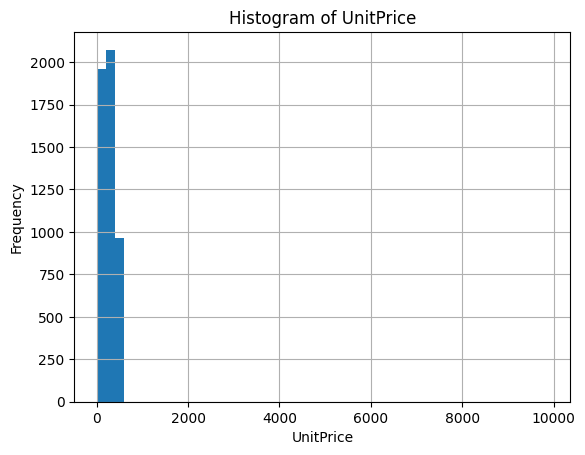

In [20]:
dfc.hist(column='UnitPrice', bins=50)
plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

### comment

**the unit price has the range between 0 to 2000**


# 10.

In [21]:
dfc['TotalAmount'].isnull().sum()

np.int64(30)

In [22]:
dfc['TotalAmount'].describe()

count    4971.000000
mean      715.853938
std       553.737712
min         6.710000
25%       270.599500
50%       571.280000
75%      1042.911000
max      2485.950000
Name: TotalAmount, dtype: float64

In [25]:
mean_amount = dfc['TotalAmount'].mean()
dfc['TotalAmount'] = df['TotalAmount'].fillna(np.nan)
dfc['TotalAmount'] = df['TotalAmount'].fillna(mean_amount)

In [26]:
dfc['TotalAmount'].isnull().sum()

np.int64(0)

# 11.

In [30]:
dfc['PurchaseDate'].dtype

dtype('O')

In [34]:
dfc['PurchaseDate'] = pd.to_datetime(dfc['PurchaseDate'])

In [35]:
dfc['PurchaseDate'].dtype

dtype('<M8[ns]')

# Section B – Exploratory Data Analysis

# 12.

In [36]:
dfc['Quantity'].describe()

count    5001.000000
mean      715.853938
std       552.073999
min         6.710000
25%       273.632000
50%       573.960000
75%      1037.916000
max      2485.950000
Name: TotalAmount, dtype: float64

In [37]:
dfc['UnitPrice'].describe()

count    5001.000000
mean      263.334387
std       306.059625
min         5.020000
25%       135.710000
50%       254.060000
75%       374.460000
max      9876.200000
Name: UnitPrice, dtype: float64

In [38]:
dfc['TotalAmount'].describe()

count    5001.000000
mean      715.853938
std       552.073999
min         6.710000
25%       273.632000
50%       573.960000
75%      1037.916000
max      2485.950000
Name: TotalAmount, dtype: float64

# 13.

In [46]:
dfc.sort_values(by=['TotalAmount']).head()

,TransactionID,CustomerName,Email,ProductCategory,Quantity,UnitPrice,Discount(%),PaymentMethod,PurchaseDate,City,Country,TotalAmount
1472,131db370-c394-42c0-9d69-33a30b826fbf,Daniel Christensen,ycastro@jackson.biz,Books,1,6.71,0.0,Cash on Delivery,2025-05-14,Harrymouth,USA,6.7100
4625,ee6c2ce7-dea7-4bf8-b542-8d5e43ca10e6,Joshua Brown,brendan97@hotmail.com,Sports,1,6.75,0.0,Cash on Delivery,2025-03-28,North Theresa,USA,6.7500
4259,c6c55a42-b113-42be-8c3e-89b6d3539b21,Troy Rodriguez,erik87@yahoo.com,Electronics,1,8.08,15.0,Debit Card,2024-12-13,Torreschester,UAE,6.8680
3061,efa55a3d-1064-4c34-b19f-68427670ea8b,Charles Pittman,david31@escobar.com,Home & Kitchen,1,6.90,NaN,Credit Card,2025-06-20,New Jameschester,USA,6.9000
4723,6957b8d3-1dd9-470a-a734-343abe9ce74c,Nicole Velez,qwalker@hotmail.com,Beauty,1,8.05,5.0,NetBanking,2025-03-12,Richardburgh,UAE,7.6475


In [48]:
sales = dfc.groupby('ProductCategory')['TotalAmount'].sum()
top_5 = sales.sort_values(ascending=False).head(5)

top_5

ProductCategory
Sports         522095.540813
Beauty         521662.420063
Electronics    516630.554438
Books          514530.947438
Clothing       511526.603813
Name: TotalAmount, dtype: float64

# 14. 

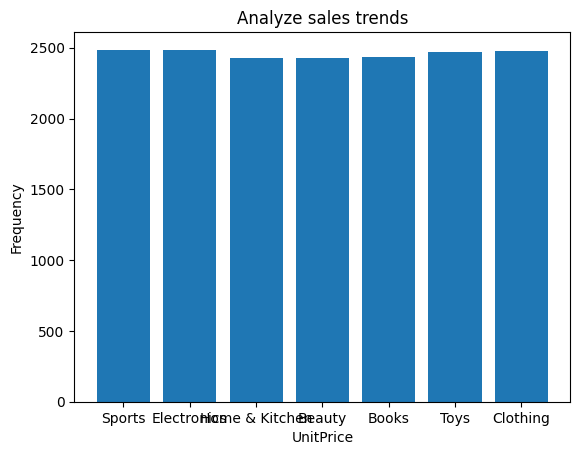

In [76]:
plt.bar(dfc['ProductCategory'], dfc['TotalAmount'])
plt.title('Analyze sales trends')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

In [57]:
dfc.columns.tolist()


['TransactionID',
 'CustomerName',
 'Email',
 'ProductCategory',
 'Quantity',
 'UnitPrice',
 'Discount(%)',
 'PaymentMethod',
 'PurchaseDate',
 'City',
 'Country',
 'TotalAmount']

In [59]:
dfc.dtypes

TransactionID              object
CustomerName               object
Email                      object
ProductCategory            object
Quantity                    int64
UnitPrice                 float64
Discount(%)               float64
PaymentMethod              object
PurchaseDate       datetime64[ns]
City                       object
Country                    object
TotalAmount               float64
dtype: object

# 15

In [73]:
dfc['PurchaseDate'] = dfc['PurchaseDate'].dt.strftime('%Y-%m')

#plt.pie(dfc[''])

AttributeError: Can only use .dt accessor with datetimelike values

# 16.

In [65]:
cities = dfc.groupby('City')['TotalAmount'].sum()
top_3 = cities.sort_values(ascending=False).head(3)

top_3

City
New Christopher    6853.8715
Smithview          5759.3070
West David         5662.3410
Name: TotalAmount, dtype: float64

# 17

In [68]:
avg = dfc.groupby('Country')['TotalAmount'].mean()

avg

Country
Australia    744.900356
India        713.454380
UAE          679.809816
UK           728.848777
USA          713.815658
Name: TotalAmount, dtype: float64

In [78]:
# PurchaseDate

pro = dfc.groupby('ProductCategory')['TotalAmount'].max()

pro

ProductCategory
Beauty            2430.05
Books             2437.60
Clothing          2480.35
Electronics       2481.85
Home & Kitchen    2429.75
Sports            2485.95
Toys              2468.00
Name: TotalAmount, dtype: float64

# 18

In [72]:
avg_dis = dfc.groupby('ProductCategory')['Discount(%)'].mean()

avg_dis

ProductCategory
Beauty            7.526132
Books             7.327434
Clothing          7.383420
Electronics       7.692308
Home & Kitchen    7.936508
Sports            7.621528
Toys              7.441230
Name: Discount(%), dtype: float64

# Section C – Insights & Reporting

# 19:

1. highest purchasing customers where from Australia
2. avg discount on products is 7.5
3. highest selling products are Beauty

# 20:
1. add sales data in the
2. 